In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.options.display.expand_frame_repr=True
pd.options.display.width = 80
pd.options.display.max_columns = None
pd.options.display.max_seq_items = 100

In [2]:
writer = pd.ExcelWriter('./output.xlsx')
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1GySCud5wSEqG6ydskdMCPZJfpYjve_Yo4mdH1TzBY_g/gviz/tq?tqx=out:csv")

In [3]:
df.drop_duplicates(inplace=True)
df.applymap(lambda x: x.strip() if type(x) is str else x)
df.rename(index=str, columns={"What is your gender?": "gender",
                              "What is your age range?": "age",
                              'What is your highest level of education?':'education',
                              'What is your ethnicity?':'ethnicity',
                              'What is your sexual orientation?':'sexual orientation',
                              'Where are you located?':'location',
                              'Where in the United States?':'us location',
                              'What is your relationship status?':'relationship status',
                              'How long have you been a redditor?':'years on reddit',
                              'Do you use more than one account on /r/nba? ':'multiple accounts',
                              'Do you have a local NBA Team?':'local NBA team',
                              'What\'s your favorite sport?':'favorite sport',
                              'How many NBA games have you attended?':'games attended',
                              'Are you or have you ever been an NBA season ticket holder?':'season tickets',
                              'How long have you regularly watched the NBA?':'years watched NBA',
                              'What\'s the highest level of basketball you\'ve played?':'highest level of basketball',
                             'What\'s your MOST favorite NBA Team?':'most favorite team',
                             'What\'s your LEAST favorite NBA Team?':'least favorite team',
                             'Who\'s your favorite NBA player':'favorite NBA player',
                             'Outside of /r/nba, where do you get your NBA news from most often?':'other social media',
                             'Social Media of Choice?':'social media of choice',
                             'Any comments/suggestions?':'comments'},inplace=True)
df.describe()

Timestamp gender    age          education ethnicity  \
count                34696  34696  34696              34696     34695   
unique               33639    195      9                  9       279   
top     6/26/2018 10:51:29   Male  22-25  Bachelor’s degree     White   
freq                     3  33150  10198              13864     21126   

       sexual orientation location us location relationship status  \
count               34695    34697       24138               34696   
unique                238      214          50                   5   
top              Straight      USA  California              Single   
freq                32792    24920        4953               19007   

       years on reddit multiple accounts local NBA team favorite sport  \
count            34696             34696          34696          34693   
unique              10                 2              2            457   
top        3 - 4 years                No            Yes     Basketball   
freq             10719             33159          20729          23581   

       games attended season tickets years watched NBA  \
count           34696          34696             34696   
unique              7              2                 8   
top              None             No      5 - 10 years   
freq            10703          33459              8093   

       highest level of basketball most favorite team    least favorite team  \
count                        34696              33383                  31897   
unique                         198                 30                     30   
top              Pick-up/Rec games          LA Lakers  Golden State Warriors   
freq                         12942               3400                  10721   

       favorite NBA player other social media social media of choice comments  
count                30639              34635                  34610     3660  
unique                3190               1701                    695     3057  
top           LeBron James            Twitter              Instagram       No  
freq                  2361              13607                   9958       52

# Gender Groupings

### Include only reasonable responses

In [4]:
df = df[df['gender'].isin([
    'Male', 'Female', 'Prefer not to say', 'Non binary', 'Non-binary', 'Non-Binary','Transexual',
    'Human','Transgender','Gender fluid',
    'Genderfluid','genderfluid','Nonbinary','NonBinary', 'Trans Woman'])]
df = df[df['sexual orientation'].isin([
    'Straight', 'Bisexual', 'Gay', 'Pansexual','Asexual', 'Queer', 'lesbian','Q',
    'Straight but I say gay stuff on r/NBA for the memes', 'Asexual ','idk', 'Asexual/Aromantic', 'Idk lol',
    'It\'s confusing','Prefer not to say.', 'Confused','Pan/Queer',
    'Lesbian ','Hyperpansexual','polyamorous', 'Unsure',
    'pansexual','Lol idk', 'Nonbinary', 'queer', 'None ','Biromantic asexual','Non','Transexual',
    'Extra Straight','Not sure'])]
df = df[~df['ethnicity'].isin(['Nephew','Bull','D','Helicopter','Bitch I\'m from mars','Creamy White','what if I\'m mexican and white?', 'Noneurbusiness', 'Kobestanian','Male','Space','Trans-Black'])]
df['gender'].value_counts().rename_axis('unique_values').reset_index(name='counts')


unique_values  counts
0                Male   33032
1              Female    1026
2   Prefer not to say     150
3          Non binary       4
4           Nonbinary       4
5          Non-binary       3
6         Genderfluid       3
7          Non-Binary       3
8         Transgender       3
9         Trans Woman       2
10         Transexual       1
11          NonBinary       1
12        genderfluid       1
13              Human       1
14       Gender fluid       1

### Fix typos/alternate spellings

In [102]:
df['gender'].replace(["Non binary",'Non-binary','Non-Binary','NonBinary'],'Non-Binary',True)
df['gender'].replace(['genderfluid','Gender fluid'],'Genderfluid',True)
df['gender'].replace(['Trans Woman','Transexual'],'Transgender',True)

### Gender Counts (Cleaned)

In [103]:
df['gender'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0               Male   33032
1             Female    1026
2  Prefer not to say     150
3         Non-Binary      11
4        Transgender       6
5        Genderfluid       5
6          Nonbinary       4
7              Human       1

### Gender Plot (Cleaned)

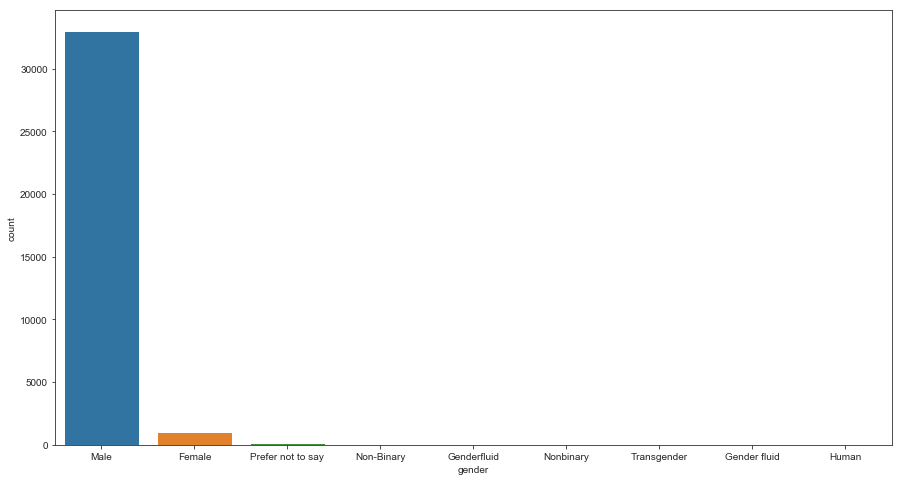

In [40]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = sns.countplot(df['gender']);

### Gender Percentiles (Cleaned)

In [42]:
df['gender'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')

unique_values    counts
0               Male  0.964861
1             Female  0.029969
2  Prefer not to say  0.004381
3         Non-Binary  0.000321
4        Transgender  0.000175
5          Nonbinary  0.000117
6        Genderfluid  0.000117
7              Human  0.000029
8       Gender fluid  0.000029

# Age Groupings

In [43]:
df['age'].value_counts().rename_axis('unique_values').reset_index(name='counts').sort_values(by=['unique_values'])

unique_values  counts
4  17 and Under    2120
1         18-21    8893
0         22-25   10090
2         26-30    8092
3         31-35    3339
5         36-40    1138
6         41-50     434
8         51-60      59
7       Over 60      70

### Age Plot

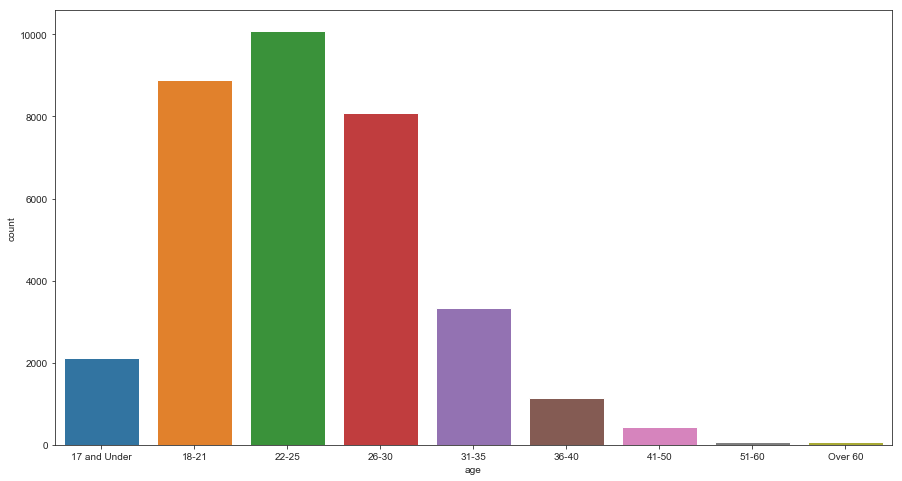

In [44]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = sns.countplot(df['age'].sort_values())

### Age Percentiles

In [45]:
df['age'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')

unique_values    counts
0         22-25  0.294728
1         18-21  0.259763
2         26-30  0.236366
3         31-35  0.097532
4  17 and Under  0.061925
5         36-40  0.033241
6         41-50  0.012677
7       Over 60  0.002045
8         51-60  0.001723

# Education

In [46]:
df['education'].replace(
    "High school graduate, diploma or the equivalent (for example: GED)", "High School Graduate",True)
df['education'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0                    Bachelor’s degree   13748
1       Some college credit, no degree    8314
2                      Master’s degree    3320
3                 High School Graduate    3180
4         Some high school, no diploma    2154
5                     Associate degree    1251
6                     Doctorate degree    1053
7                  Professional degree     651
8  Trade/technical/vocational training     564

### Education Plot

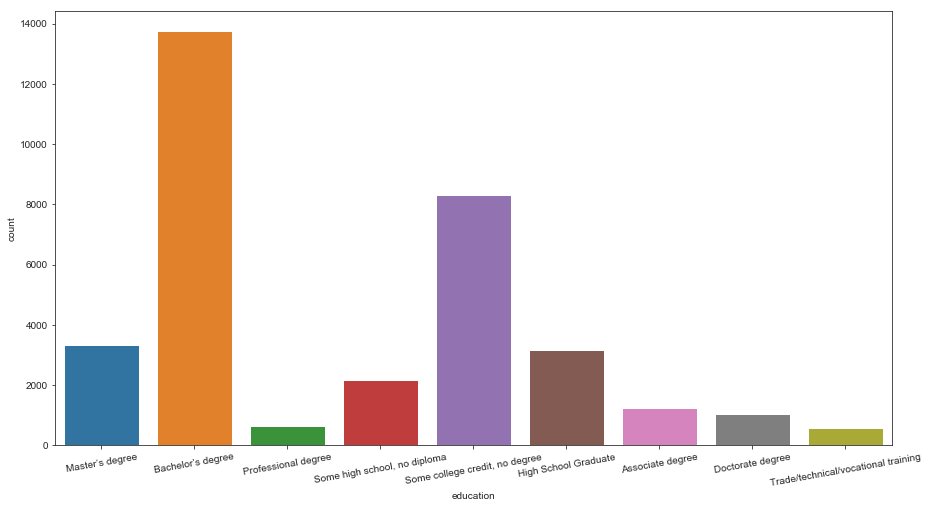

In [47]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
g=sns.countplot(df['education'])
_ = g.set_xticklabels(ax.get_xticklabels(),rotation=10)

# Ethnicity

In [48]:
ecounts = df['ethnicity'].value_counts()
ecounts[ecounts > 1].rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0                   White   20939
1                   Asian    4417
2   Indian or South Asian    2141
3                Hispanic    2083
4                   Mixed    1831
5                   Black    1616
6          Middle Eastern     601
7        Pacific Islander     205
8         Native American     130
9                  Jewish      18
10               Armenian       8
11          North African       8
12               Filipino       6
13       South East Asian       6
14                  Maori       5
15               American       5
16                 Latino       5
17        Southeast Asian       4
18               European       4
19                  Greek       3
20                  Malay       3
21                    Jew       3
22                Turkish       3
23                  Irish       3
24              Brazilian       3
25             Australian       3
26          North african       2
27         White Hispanic       2
28       Eastern European       2
29                   Slav       2
30         Latin American       2
31                 Nordic       2
32               Guyanese       2
33       Dont want to say       2
34          north african       2
35          Mediterranean       2
36                African       2
37                 Afghan       2
38                Persian       2
39       South-East Asian       2
40              Pakistani       2
41                Mexican       2
42                   Arab       2

### Ethnicity Plot

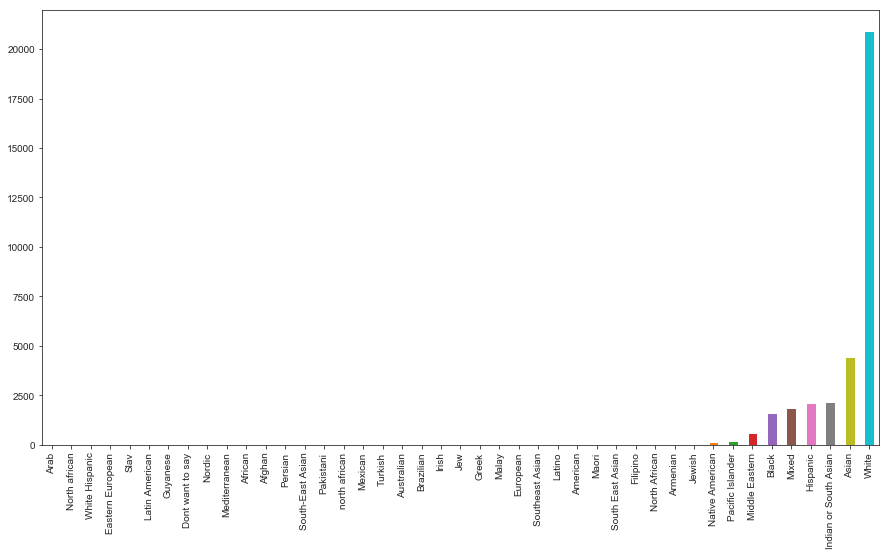

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = ecounts[ecounts > 1].sort_values().plot(kind="bar");

# Sexual Orientation

In [50]:
df['sexual orientation'].replace([
    'idk', 'Idk lol', 'It\'s confusing','Confused','Lol idk', 'Unsure', 'Not sure'],'unsure',True)
df['sexual orientation'].replace(['Pan/Queer','Q', 'Hyperpansexual','queer', 'pansexual'],'Pansexual',True)
df['sexual orientation'].replace([
    'Extra Straight','Straight but I say gay stuff on r/NBA for the memes',
    'Like 95% straight but I’d probably fuck Kevin Love'],'Straight',True)
df['sexual orientation'].replace(['Asexual/Aromantic','Asexual '],'Asexual',True)
df['sexual orientation'].replace(['Non','None'],'Asexual',True)
df['sexual orientation'].replace(['lesbian','Lesbian '],'Lesbian',True)

### Removing data with response frequency of 1

In [51]:
sxorcounts = df['sexual orientation'].value_counts()
sxorcounts.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0             Straight   32653
1             Bisexual    1212
2                  Gay     278
3            Pansexual      39
4              Asexual      22
5                Queer      12
6               unsure      10
7              Lesbian       3
8           Transexual       1
9   Biromantic asexual       1
10           Nonbinary       1
11  Prefer not to say.       1
12         polyamorous       1
13               None        1

### Sexual Orientation Plot (Cleaned)

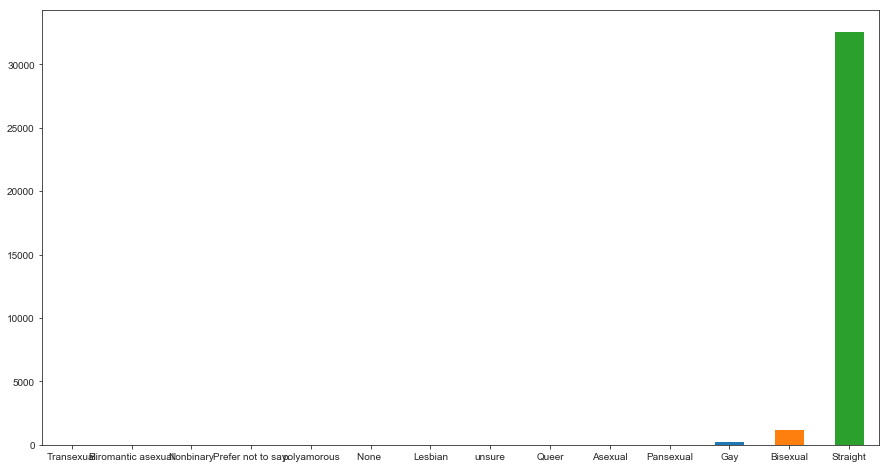

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = sxorcounts.sort_values().plot(kind="bar",rot=0)

# General Location

In [53]:
df =df[df['location']!='Nephew']
df['location'].replace(['Singapore, how the fuck is India or South Asia a choice? ','singapore','singapore '],'Singapore',True)
df['location'].replace('BC, Canada','Canada',True)
df['location'].replace(['Viet Nam'],'Vietnam',True)
df['location'].replace('Denmark. I realise it is in Europe, but just to specify.','Denmark',True)
df['location'].replace(['Texas','US'],'USA',True)
df['location'].replace(['phillipines','Phillipines','Philippines ','philippines'],'Philippines',True)
df['location'].replace('Luxemburg','Luxembourg',True)
df['location'].replace(['South East Asia','South East Asia '],'Southeast Asia',True)
df['location'].value_counts().rename_axis('unique_values').reset_index(name='counts')


unique_values  counts
0                               USA   24674
1                            Europe    2664
2                            Canada    2331
3                         Australia    1336
4                    United Kingdom     671
5                      Asia-Pacific     481
6                       New Zealand     364
7                     South America     336
8                       Middle East     196
9                       Asia(Other)     183
10              India or South Asia     165
11                           Africa     110
12                            China      77
13                            Japan      68
14                           Mexico      61
15                        Caribbean      58
16                  Central America      40
17                      Philippines      34
18                           Turkey      25
19                          Ireland      17
20                           Brazil      15
21                          Denmark      14
22                           Sweden      13
23                      Netherlands      13
24                        Lithuania      11
25                         Portugal      10
26                           Poland       9
27                        Hong Kong       9
28                        Singapore       9
29                           Russia       9
..                              ...     ...
113                            Iran       1
114                          russia       1
115                   UK is my city       1
116                  southeast asia       1
117                          greece       1
118                            Peru       1
119                           Nepal       1
120                The Netherlands        1
121             Specifically Greece       1
122                        Trinidad       1
123      South East Asia (Malaysia)       1
124                           FYROM       1
125                       Venezuela       1
126                 USA & EU (work)       1
127                     netherlands       1
128                      Caribbean        1
129             Republic of Ireland       1
130                         Algeria       1
131                           Czech       1
132       no Philippines? cmon bruh       1
133                    South Africa       1
134                           Syria       1
135                          Latvia       1
136                           Egypt       1
137                      Guam (USA)       1
138                         Romania       1
139  A universe where anime is real       1
140               Already told you.       1
141                    Saudi Arabia       1
142                 Russia (Europe)       1

[143 rows x 2 columns]

### Location Plot

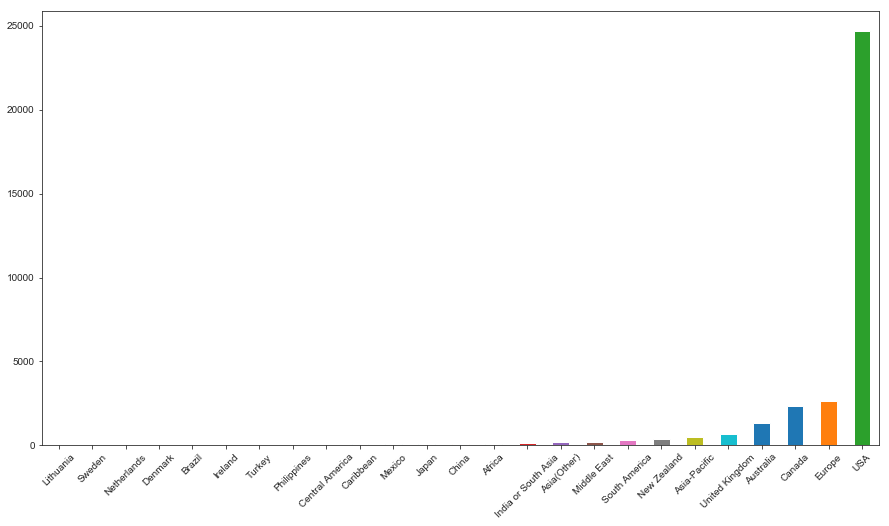

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = (df['location'].value_counts())[df['location'].value_counts()>10].sort_values().plot(kind="bar",rot=45)

# U.S. Location

In [55]:
df['us location'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0       California    4892
1            Texas    2172
2         New York    1618
3         Illinois    1143
4             Ohio     928
5    Massachusetts     927
6          Florida     903
7     Pennsylvania     888
8       New Jersey     697
9       Washington     615
10        Virginia     596
11  North Carolina     546
12         Georgia     531
13        Michigan     515
14       Minnesota     487
15          Oregon     484
16         Indiana     437
17         Arizona     420
18        Maryland     413
19            Utah     406
20        Colorado     388
21       Wisconsin     377
22        Oklahoma     299
23       Tennessee     279
24        Kentucky     264
25     Connecticut     250
26        Missouri     249
27       Louisiana     208
28          Kansas     178
29            Iowa     175
30         Alabama     167
31  South Carolina     157
32        Nebraska     141
33          Nevada     140
34        Arkansas     106
35   New Hampshire      95
36           Idaho      87
37           Maine      85
38          Hawaii      81
39    Rhode Island      67
40        Delaware      62
41   West Virginia      59
42      New Mexico      56
43     Mississippi      50
44    South Dakota      43
45         Vermont      43
46         Montana      43
47          Alaska      37
48    North Dakota      32
49         Wyoming      17

### U.S. Location Plot

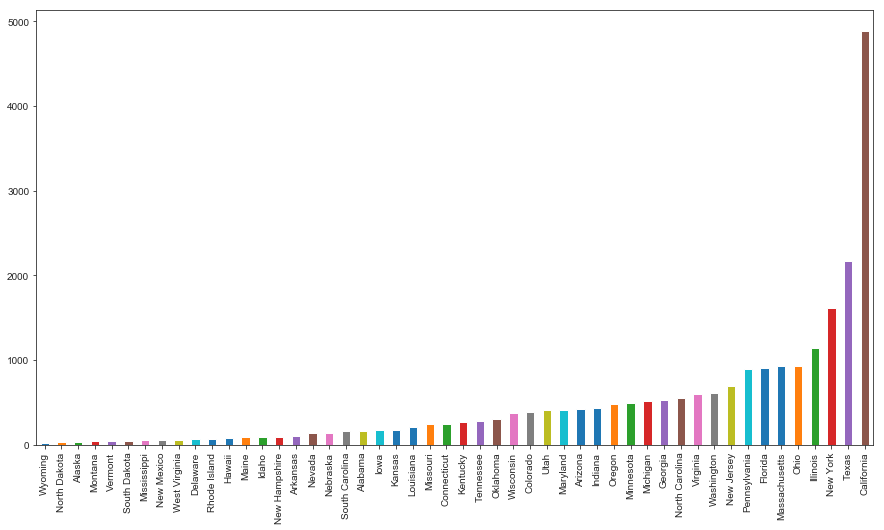

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['us location'].value_counts().sort_values().plot(kind="bar")

# Relationship status

In [57]:
df['relationship status'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0             Single   18770
1  In a relationship    9894
2            Married    4416
3            Engaged    1056
4            Widowed      99

### Relationship status plot

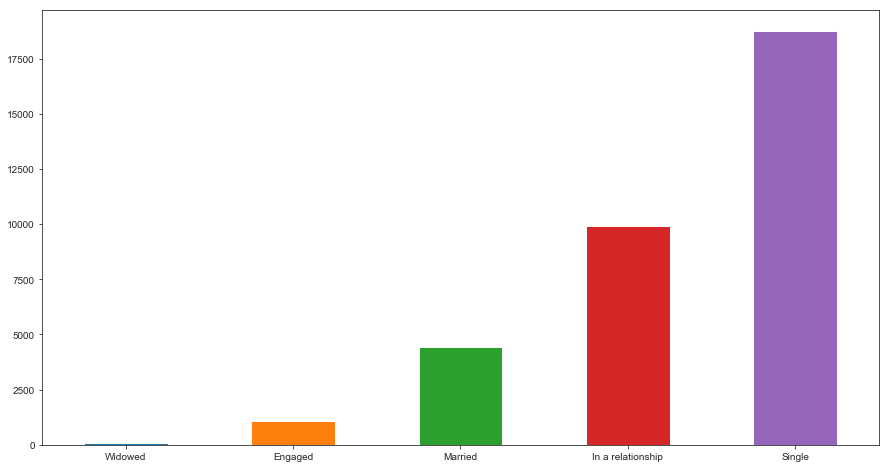

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['relationship status'].value_counts().sort_values().plot(kind="bar",rot=0)

# How long have you been a redditor?

In [59]:
df['years on reddit'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0         3 - 4 years   10601
1         5 - 6 years    8240
2         1 - 2 years    7565
3         7 - 8 years    2871
4       7 - 12 months    1645
5        4 - 6 months    1097
6  Less than 3 months    1031
7         8 - 9 years     672
8          10 + years     512
9           7 + years       1

### Redditor Duration Plot

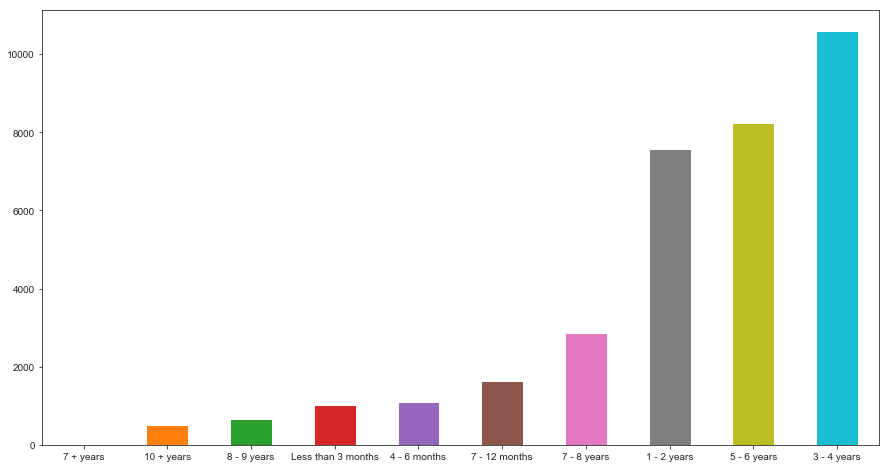

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['years on reddit'].value_counts().sort_values().plot(kind="bar",rot=0)

# Do you use more than one account on r/NBA?

In [61]:
df[
'multiple accounts'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0            No   32780
1           Yes    1455

### Number of accounts plot

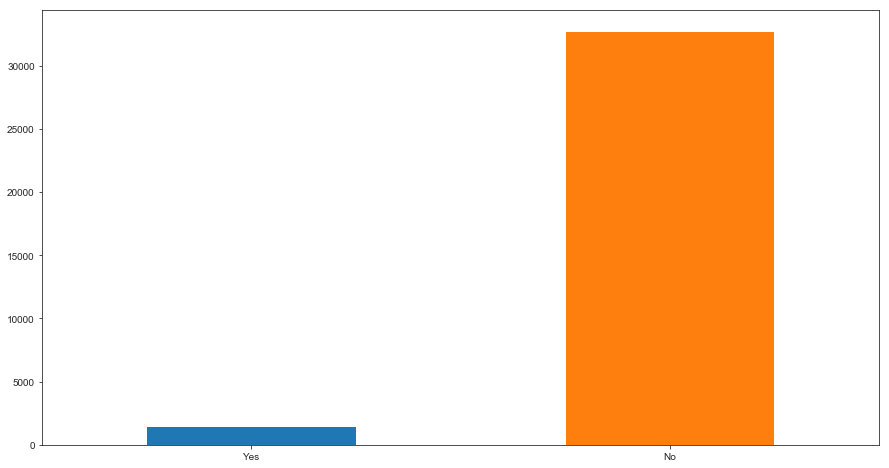

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['multiple accounts'].value_counts().sort_values().plot(kind="bar",rot=0)

# Do you have a local NBA team?

In [63]:
df['local NBA team'].value_counts().to_excel(writer, "localnbateam")
writer.save()
df['local NBA team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0           Yes   20491
1            No   13744

### Local NBA Team Plot

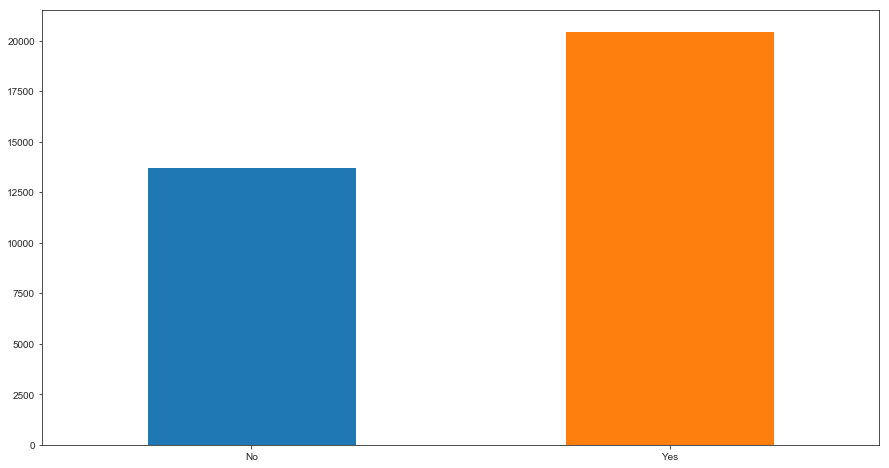

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['local NBA team'].value_counts().sort_values().plot(kind="bar",rot=0)

# What's your favorite sport?

In [105]:
df['favorite sport'].replace(['tennis','Tennis '],'Tennis',True)
df['favorite sport'].replace(['Mma'],'MMA',True)
df['favorite sport'].replace([
    'Australian Rules Football','Australian Football','Australian Rules Football ',
    'Australian football','Australian rules football'],'AFL',True)
df['favorite sport'].replace(['Rugby League','rugby', 'rugby league','Rugby '],'Rugby',True)
df['favorite sport'].replace(['cricket','Cricket '],'Cricket',True)
df['favorite sport'].replace(['Track & Field'],'Track and Field',True)
df['favorite sport'].replace(['Ultimate','Ultimate frisbee'],'Ultimate Frisbee',True)
df['favorite sport'].replace(['Water polo'],'Water Polo',True)
df['favorite sport'].replace(['volleyball','volleyball ','Volleyball '],'Volleyball',True)

favsport = df['favorite sport'].value_counts()
favsport = favsport[favsport>1]
favsport.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0              Basketball   23335
1                Football    4401
2                  Soccer    2967
3                Baseball    1424
4                  Hockey     619
5                  Tennis     146
6                   Rugby     145
7                     MMA      90
8                     AFL      89
9                    Golf      81
10             Volleyball      77
11                Cricket      77
12       Ultimate Frisbee      48
13               Lacrosse      31
14                 Boxing      22
15               Swimming      22
16              Formula 1      17
17        Track and Field      16
18                Running      15
19              Badminton      15
20                Cycling      14
21                Curling      13
22              Wrestling      13
23             Water Polo      13
24                    mma      10
25            Rugby Union      10
26                     F1       9
27               Handball       9
28                 Rowing       7
29            Motorsports       7
..                    ...     ...
67                   MMA        3
68            Auto Racing       3
69                 Racing       3
70      League of Legends       3
71                    Afl       2
72       Track and field        2
73      Ultimate frisbee        2
74           Aussie rules       2
75  Aussie Rules Football       2
76                   Judo       2
77                Snooker       2
78              badminton       2
79           Snowboarding       2
80         Skateboarding        2
81                Hurling       2
82                   Sumo       2
83              Athletics       2
84                   None       2
85             All sports       2
86                eSports       2
87                 Futsal       2
88                   Mma        2
89        Mountain Biking       2
90     Aussie Rules Footy       2
91               ultimate       2
92                   Dota       2
93            Motorsport        2
94                   AFL        2
95          Nordic Skiing       2
96                 skiing       2

[97 rows x 2 columns]

### Favorite sport plot

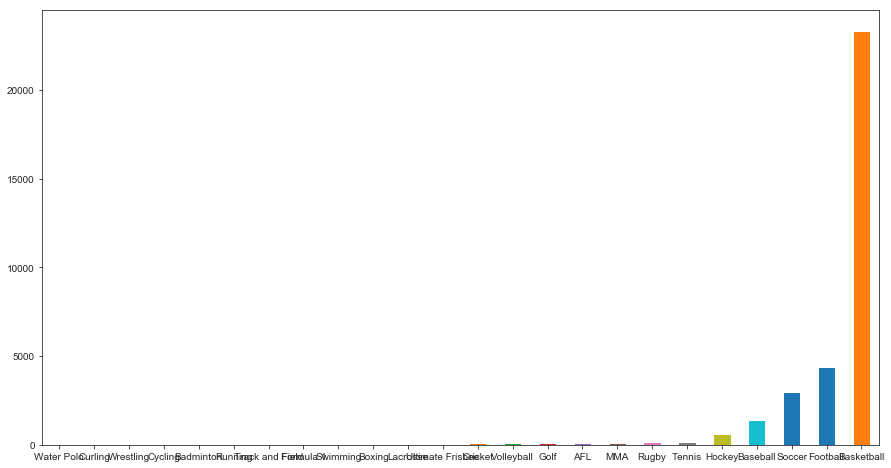

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = (favsport)[favsport>10].sort_values().plot(kind="bar",rot=0)

# How many NBA games have you attended?

In [67]:
df['games attended'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0          None   10571
1         2 - 5    6396
2         1 - 2    6109
3        6 - 10    4591
4       11 - 20    3158
5       21 - 50    2170
6           50+    1240

### NBA Games Attended Plot

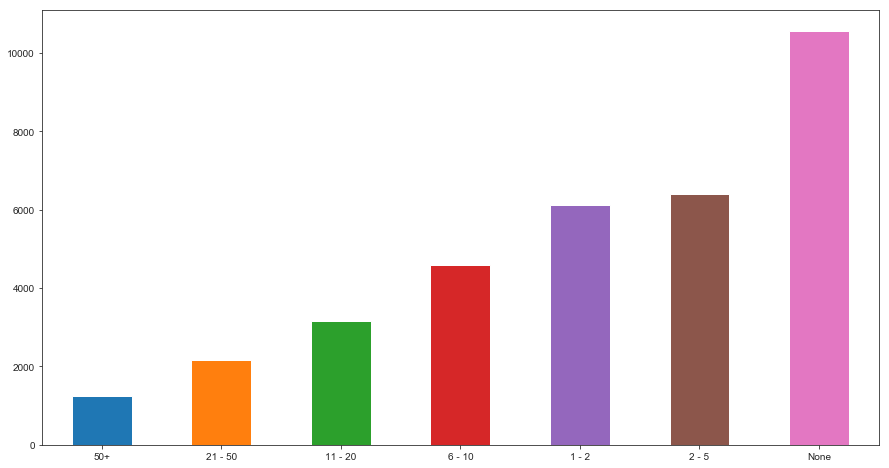

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['games attended'].value_counts().sort_values().plot(kind="bar",rot=0)

# Do you have a local NBA Team?

In [69]:
df['local NBA team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0           Yes   20491
1            No   13744

### Local NBA Team plot

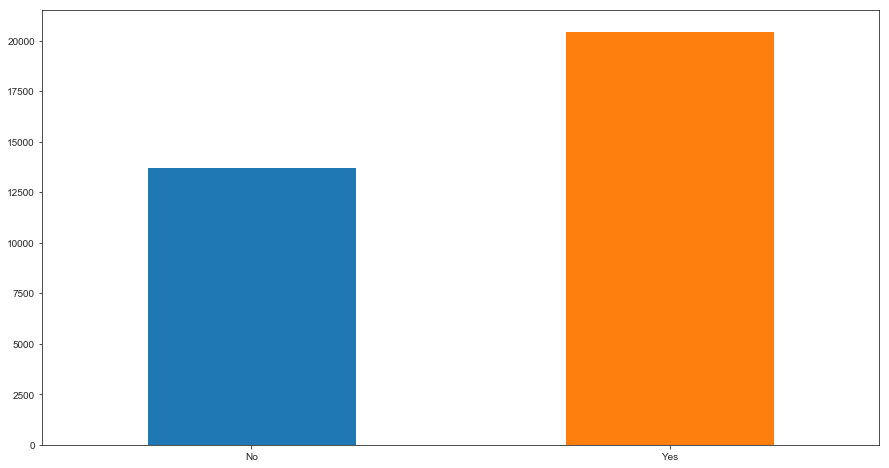

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['local NBA team'].value_counts().sort_values().plot(kind="bar",rot=0)

# How long have you regularly watched the NBA?

In [71]:
df['years watched NBA'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0             5 - 10 years    8013
1             10 -20 years    7208
2              3 - 5 years    5397
3              2 - 3 years    3646
4              1 - 2 years    3266
5                20+ years    3094
6  I don't watch regularly    2513
7         Less than 1 year    1098

### Years watched NBA plot

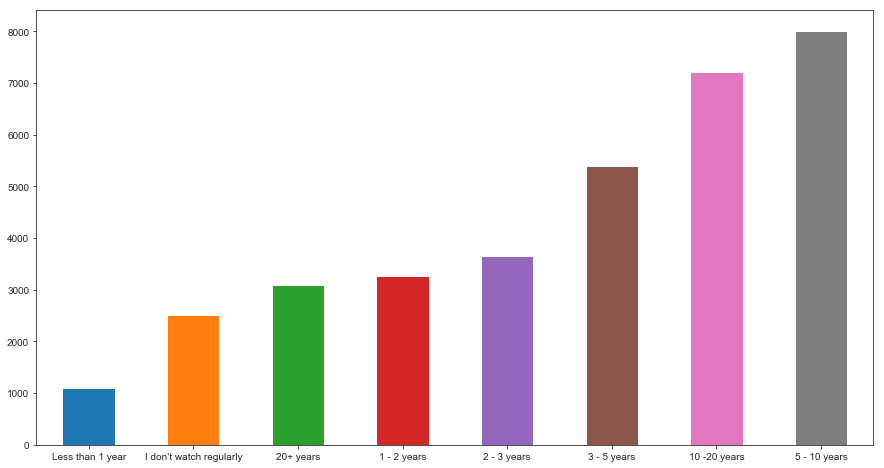

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['years watched NBA'].value_counts().sort_values().plot(kind="bar",rot=0)

# What's the highest level of basketball you've played

In [73]:
highestbasketball = df['highest level of basketball'].value_counts()
highestbasketball = highestbasketball[highestbasketball>2]
highestbasketball.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0          Pick-up/Rec games   12831
1           High School team    6573
2        Jr. High or earlier    5744
3       Organized Intramural    3570
4        I have never played    3094
5             AAU or similar    1246
6            College (Other)     687
7  Professional (Any League)     208
8              College (D-1)     128

### Level of basketball plot

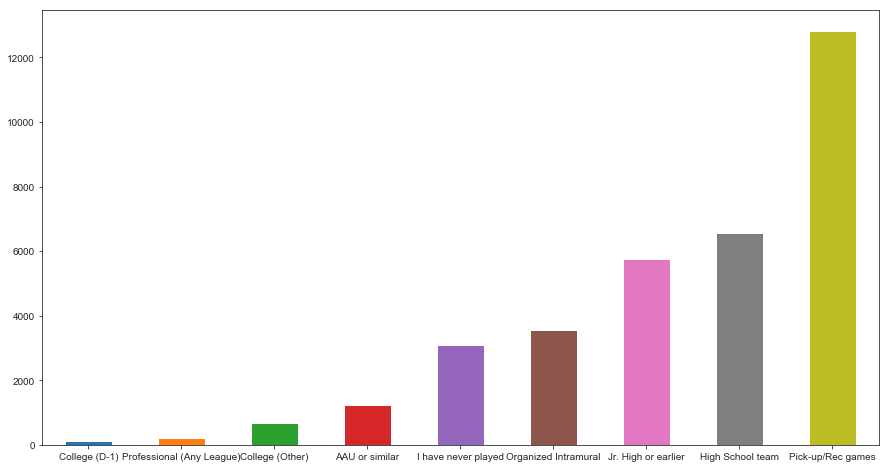

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = highestbasketball.sort_values().plot(kind="bar",rot=0)

# What's your MOST favorite NBA team?

In [75]:
df['most favorite team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0                LA Lakers    3362
1    Golden State Warriors    3212
2           Boston Celtics    2996
3      Cleveland Cavaliers    1933
4      Philadelphia Sixers    1879
5          Toronto Raptors    1794
6        San Antonio Spurs    1777
7            Chicago Bulls    1544
8          New York Knicks    1381
9    Oklahoma City Thunder    1233
10         Houston Rockets    1221
11        Dallas Mavericks     999
12  Minnesota Timberwolves     900
13  Portland Trail Blazers     832
14              Miami Heat     783
15               Utah Jazz     772
16         Milwaukee Bucks     708
17         Detroit Pistons     647
18      Washington Wizards     568
19            Phoenix Suns     565
20          Indiana Pacers     555
21          Denver Nuggets     477
22        Sacramento Kings     443
23    New Orleans Pelicans     397
24           Atlanta Hawks     389
25       Charlotte Hornets     356
26             LA Clippers     351
27           Brooklyn Nets     348
28           Orlando Magic     301
29       Memphis Grizzlies     232

### Most favorite NBA team plot

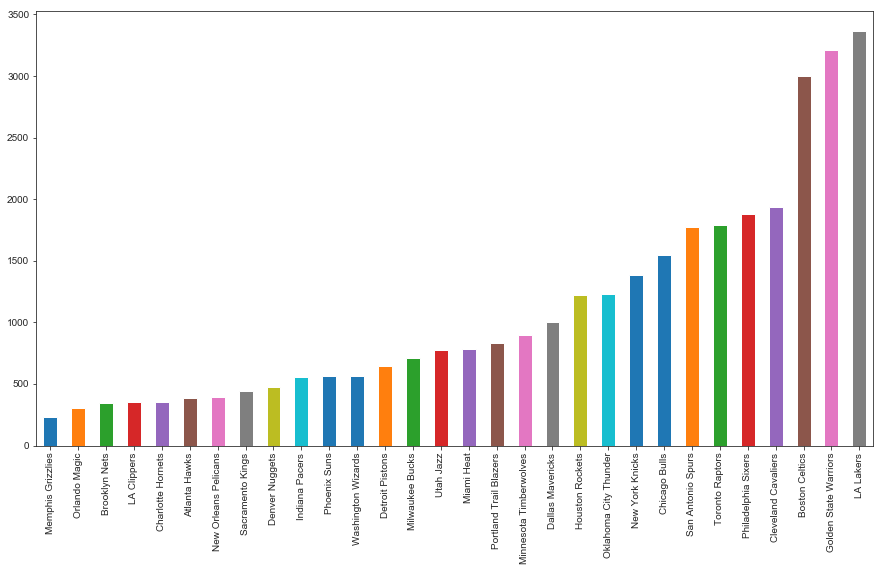

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['most favorite team'].value_counts().sort_values().plot(kind="bar")

# What's your LEAST favorite NBA Team?

In [77]:
df['least favorite team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0    Golden State Warriors   10610
1                LA Lakers    4861
2           Boston Celtics    3641
3      Cleveland Cavaliers    2427
4          Houston Rockets    2317
5    Oklahoma City Thunder     999
6          New York Knicks     644
7              LA Clippers     611
8      Philadelphia Sixers     602
9       Washington Wizards     444
10        Sacramento Kings     425
11       San Antonio Spurs     414
12              Miami Heat     395
13           Orlando Magic     378
14           Brooklyn Nets     373
15       Charlotte Hornets     281
16           Atlanta Hawks     246
17         Detroit Pistons     238
18           Chicago Bulls     227
19       Memphis Grizzlies     216
20         Toronto Raptors     204
21        Dallas Mavericks     200
22          Denver Nuggets     146
23               Utah Jazz     136
24            Phoenix Suns     127
25          Indiana Pacers     105
26  Portland Trail Blazers      76
27  Minnesota Timberwolves      55
28         Milwaukee Bucks      43
29    New Orleans Pelicans      43

### Lease favorite NBA team plot

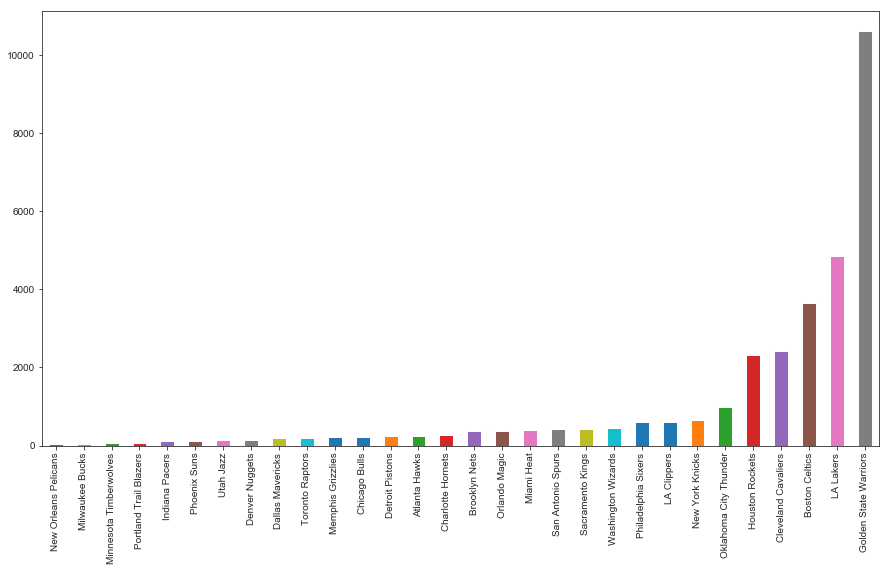

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['least favorite team'].value_counts().sort_values().plot(kind="bar")

# Favorite NBA Player

### Cleaning up the data some

In [79]:
favNBAPlayer = df['favorite NBA player'].str.strip()
favNBAPlayer.replace(['Lebron James', 'Lebron','LeBron','Lebron james','lebron','lebron james'], "LeBron James",True)
favNBAPlayer.replace(['Giannis'],'Giannis Antetokounmpo',True)
favNBAPlayer.replace(['Steph Curry','Curry','Steph curry','Steph'],'Stephen Curry',True)
favNBAPlayer.replace(['Dirk'],'Dirk Nowitzki',True)
favNBAPlayer.replace(['Kobe','kobe','Kobe bryant'],'Kobe Bryant',True)
favNBAPlayer.replace(['Westbrook','Russel Westbrook'],'Russell Westbrook',True)
favNBAPlayer.replace(['Porzingis'],'Kristaps Porzingis',True)
favNBAPlayer.replace(['Jokic'],'Nikola Jokic',True)
favNBAPlayer.replace(['Tatum'],'Jayson Tatum',True)
favNBAPlayer.replace(['Klay'],'Klay Thompson',True)
favNBAPlayer.replace(['Jordan'],'Michael Jordan',True)
favNBAPlayer.replace(['Embiid','Joel embiid'],'Joel Embiid',True)

### Fav NBA Player (minimum 50 votes)

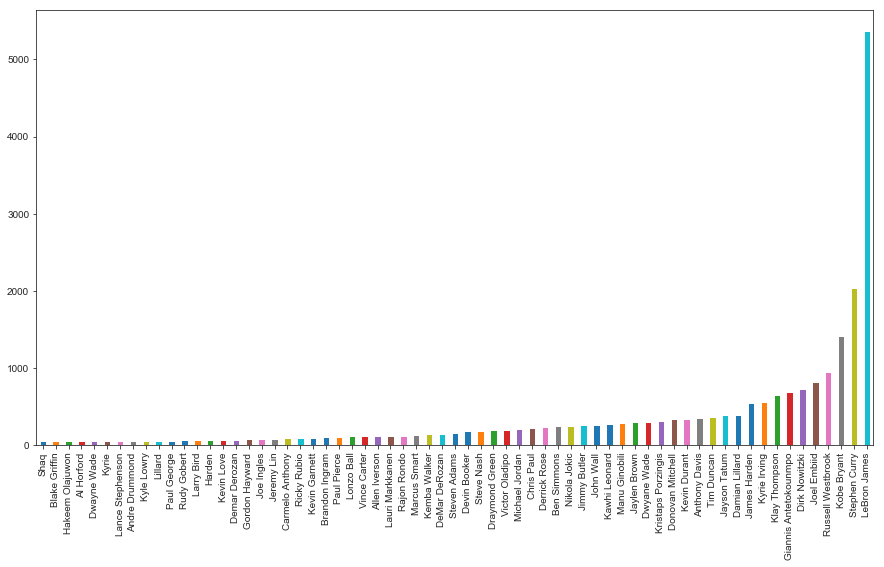

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = (favNBAPlayer.value_counts())[favNBAPlayer.value_counts()>50].sort_values().plot(kind="bar")

# Outside of /r/NBA where do you get your NBA news from most often?

In [81]:
socialmedia = df['other social media'].replace(['Nowhere','none','nowhere', 'Nowhere else', "No where else", "Reddit", "I don't", "I dont", "r/nba", "R/nba", "r/nba only","Nowhere.","No",'None really'],['None','None','None','None','None','None','None','None','None','None','None','None','None','None'])

socialmedia = socialmedia.str.upper()
socialmedia.replace(["THESCORE"],"THE SCORE",True)
socialmedia.replace(["NOWHERE", "I DON'T ","ONLY R/NBA"],"NONE",True)
socialmedia = socialmedia.replace(['Ringer'],['The Ringer'])
socialmedia = socialmedia.replace('YOUTUBE ','YOUTUBE')

## Replaced similar values

### Include only response frequency > 10

In [82]:
smcounts = socialmedia.value_counts()
smcounts = smcounts[smcounts>10]
smcounts.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0           TWITTER   13462
1              ESPN    9452
2   BLEACHER REPORT    5375
3              NONE     660
4             YAHOO     572
5         INSTAGRAM     358
6        THE RINGER     319
7           YOUTUBE     306
8         THE SCORE     249
9          FACEBOOK     173
10           GOOGLE     169
11         PODCASTS     146
12          FRIENDS     110
13          NBA.COM     106
14      GOOGLE NEWS      65
15           RINGER      62
16           REALGM      55
17          NBA APP      50
18        HOOPSHYPE      41
19        SB NATION      40
20        ROTOWORLD      39
21         SBNATION      38
22         DEADSPIN      37
23     THE ATHLETIC      37
24            RADIO      27
25       INSTAGRAM       24
26    THE SCORE APP      24
27             HUPU      19
28         NO WHERE      17
29              TSN      17
30               IG      17
31       CBS SPORTS      16
32     THESCORE APP      15
33    WORD OF MOUTH      14
34           REDDIT      14
35     CHRIS SMOOVE      14
36        FACEBOOK       13
37              WOJ      13
38  BARSTOOL SPORTS      13
39       THE SCORE       13
40      ONLY REDDIT      13
41              CBS      12
42      THE RINGER       12
43              FS1      12
44     THE STARTERS      12
45         FRIENDS       12
46          GOOGLE       11

### Outside of r/NBA where do you get your news from plot

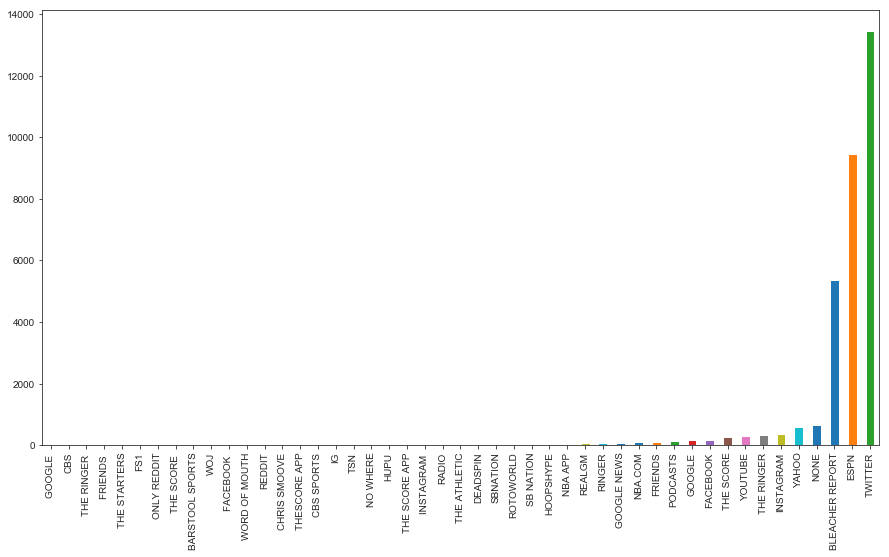

In [83]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = smcounts.sort_values().plot(kind="bar")

# Other social media of choice?

In [84]:
othersocialmedia = df['social media of choice']
othersocialmedia = othersocialmedia.str.upper()
othersocialmedia.replace(['REDDIT ',"REDDIT?"],"REDDIT",True)
othersocialmedia.replace(["NONE","NONE.","NOTHING","NO","NONE OF THE ABOVE","NONE ","NO SOCIAL MEDIA","I DON'T USE SOCIAL MEDIA","I DON'T USE SOCIAL MEDIA.","DON'T USE SOCIAL MEDIA"],"NONE",True)


In [85]:
socounts = othersocialmedia.value_counts()
socounts[socounts>10].rename_axis('unique_values').reset_index(name='counts')


unique_values  counts
0           INSTAGRAM    9859
1             TWITTER    9359
2            FACEBOOK    6890
3            SNAPCHAT    4538
4                NONE    1638
5              REDDIT    1046
6             YOUTUBE      60
7            LINKEDIN      25
8             DISCORD      16
9              TUMBLR      13
10           WHATSAPP      12
11  FUCK SOCIAL MEDIA      12
12             WECHAT      11

### Other social media of choice plot

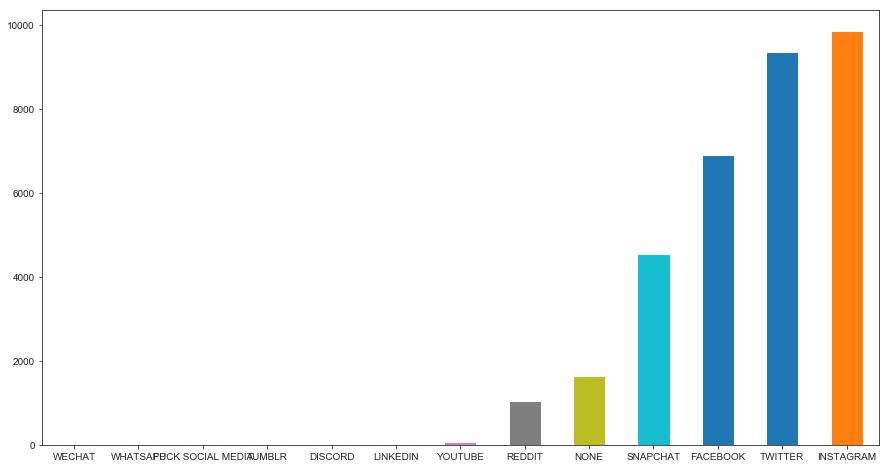

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = socounts[socounts>10].sort_values().plot(kind="bar",rot=0)

### Write data to excel for infogram.com

In [108]:
favsport

Basketball               23335
Football                  4401
Soccer                    2967
Baseball                  1424
Hockey                     619
Tennis                     146
Rugby                      145
MMA                         90
AFL                         89
Golf                        81
Volleyball                  77
Cricket                     77
Ultimate Frisbee            48
Lacrosse                    31
Boxing                      22
Swimming                    22
Formula 1                   17
Track and Field             16
Running                     15
Badminton                   15
Cycling                     14
Curling                     13
Wrestling                   13
Water Polo                  13
mma                         10
Rugby Union                 10
F1                           9
Handball                     9
Rowing                       7
Motorsports                  7
                         ...  
MMA                          3
Auto Rac

In [110]:
df['age'].value_counts().to_excel(writer, "age")
df['gender'].value_counts().to_excel(writer, "gender")
df['education'].value_counts().to_excel(writer, "education")
ecounts.to_excel(writer, "ethnicity")
df['relationship status'].value_counts().to_excel(writer, "relationship")
df['sexual orientation'].value_counts().to_excel(writer, "sexualorientation")
df['location'].value_counts().to_excel(writer, "generallocation")
df['us location'].value_counts().to_excel(writer, "uslocation")
df['years on reddit'].value_counts().to_excel(writer, "redditorlength")
df['multiple accounts'].value_counts().to_excel(writer, "oneaccount")
favsport.to_excel(writer, "favoritesport")
df['games attended'].value_counts().to_excel(writer, "nbagamesattended")
df['local NBA team'].value_counts().to_excel(writer,'localnbateam')
highestbasketball.to_excel(writer,'howmuchbasketball')
df['years watched NBA'].value_counts().to_excel(writer,'howlongwatched')
df['most favorite team'].value_counts().to_excel(writer,'mostfavoriteteam')
df['least favorite team'].value_counts().to_excel(writer,'leastfavoriteteam')
favNBAPlayer.value_counts().to_excel(writer,'favorite NBA player')
smcounts.to_excel(writer,'other social media counts')
socounts.to_excel(writer,'social media of choice counts')
writer.save()

# Further data analysis

In [90]:
(df.groupby('gender'))['age'].value_counts()

gender             age         
Female             26-30            306
                   22-25            254
                   18-21            191
                   31-35            118
                   17 and Under      60
                   36-40             40
                   Over 60           26
                   41-50             19
                   51-60             12
Gender fluid       22-25              1
Genderfluid        18-21              1
                   26-30              1
                   31-35              1
                   Over 60            1
Human              26-30              1
Male               22-25           9808
                   18-21           8660
                   26-30           7747
                   31-35           3194
                   17 and Under    2048
                   36-40           1092
                   41-50            410
                   51-60             44
                   Over 60           29
Non-Bina

In [91]:
(df.groupby('gender'))['education'].value_counts()

gender             education                          
Female             Bachelor’s degree                        453
                   Some college credit, no degree           180
                   Master’s degree                          140
                   Doctorate degree                          66
                   Some high school, no diploma              61
                   High School Graduate                      58
                   Professional degree                       28
                   Associate degree                          27
                   Trade/technical/vocational training       13
Gender fluid       Some college credit, no degree             1
Genderfluid        Bachelor’s degree                          1
                   Doctorate degree                           1
                   Some college credit, no degree             1
                   Trade/technical/vocational training        1
Human              Bachelor’s degree             

In [92]:
(df.groupby('gender'))['ethnicity'].value_counts()

gender             ethnicity                                                           
Female             White                                                                     447
                   Asian                                                                     263
                   Black                                                                      82
                   Hispanic                                                                   64
                   Mixed                                                                      62
                   Indian or South Asian                                                      50
                   Middle Eastern                                                             22
                   Native American                                                            16
                   Pacific Islander                                                           15
                   European            

In [93]:
(df.groupby('gender'))['sexual orientation'].value_counts()

gender             sexual orientation
Female             Straight                741
                   Bisexual                187
                   Gay                      81
                   Pansexual                 9
                   Lesbian                   3
                   Queer                     3
                   Asexual                   2
Gender fluid       Pansexual                 1
Genderfluid        Bisexual                  2
                   Gay                       1
                   Straight                  1
Human              Asexual                   1
Male               Straight              31806
                   Bisexual                986
                   Gay                     184
                   Pansexual                21
                   Asexual                  17
                   unsure                    9
                   Queer                     7
                   Biromantic asexual        1
                   Non

In [94]:
(df.groupby('gender'))['relationship status'].value_counts()

gender             relationship status
Female             Single                   528
                   In a relationship        282
                   Married                  150
                   Engaged                   35
                   Widowed                   31
Gender fluid       Single                     1
Genderfluid        Single                     2
                   In a relationship          1
                   Widowed                    1
Human              Single                     1
Male               Single                 18153
                   In a relationship       9572
                   Married                 4248
                   Engaged                 1011
                   Widowed                   48
Non-Binary         Single                     9
                   Engaged                    1
                   Married                    1
Nonbinary          In a relationship          2
                   Single                     2
P

In [95]:
(df.groupby('age'))['education'].value_counts()

age           education                          
17 and Under  Some high school, no diploma           1754
              High School Graduate                    291
              Some college credit, no degree           39
              Doctorate degree                         13
              Master’s degree                           8
              Bachelor’s degree                         7
              Trade/technical/vocational training       4
              Associate degree                          3
              Professional degree                       1
18-21         Some college credit, no degree         4623
              High School Graduate                   2116
              Bachelor’s degree                      1415
              Associate degree                        296
              Some high school, no diploma            259
              Trade/technical/vocational training      79
              Master’s degree                          67
              Doctorat

In [96]:
(df.groupby('age'))['ethnicity'].value_counts()

age           ethnicity                                                                                      
17 and Under  White                                                                                              1159
              Asian                                                                                               322
              Indian or South Asian                                                                               189
              Mixed                                                                                               132
              Black                                                                                               121
              Hispanic                                                                                            115
              Middle Eastern                                                                                       48
              Pacific Islander                                  

In [97]:
(df.groupby('age'))['relationship status'].value_counts()

age           relationship status
17 and Under  Single                 1835
              In a relationship       272
              Widowed                   8
              Engaged                   3
              Married                   2
18-21         Single                 6543
              In a relationship      2271
              Engaged                  41
              Married                  26
              Widowed                  12
22-25         Single                 5778
              In a relationship      3662
              Married                 364
              Engaged                 279
              Widowed                   7
26-30         Single                 3288
              In a relationship      2770
              Married                1505
              Engaged                 515
              Widowed                  14
31-35         Married                1523
              Single                  936
              In a relationship       698


In [98]:
(df.groupby('age'))['years on reddit'].value_counts()

age           years on reddit   
17 and Under  1 - 2 years            968
              3 - 4 years            395
              7 - 12 months          290
              4 - 6 months           202
              Less than 3 months     193
              5 - 6 years             61
              10 + years               7
              7 - 8 years              4
18-21         3 - 4 years           3155
              1 - 2 years           2709
              5 - 6 years           1462
              7 - 12 months          594
              4 - 6 months           391
              Less than 3 months     386
              7 - 8 years            171
              8 - 9 years             14
              10 + years              11
22-25         3 - 4 years           3297
              5 - 6 years           2882
              1 - 2 years           2002
              7 - 8 years            827
              7 - 12 months          416
              4 - 6 months           279
              Less than 

In [99]:
(df.groupby('age'))['years watched NBA'].value_counts()

age           years watched NBA      
17 and Under  1 - 2 years                 469
              2 - 3 years                 434
              3 - 5 years                 392
              5 - 10 years                326
              I don't watch regularly     221
              Less than 1 year            212
              10 -20 years                 61
              20+ years                     5
18-21         5 - 10 years               2116
              3 - 5 years                1870
              1 - 2 years                1447
              2 - 3 years                1413
              10 -20 years                835
              I don't watch regularly     698
              Less than 1 year            496
              20+ years                    18
22-25         5 - 10 years               2913
              10 -20 years               2355
              3 - 5 years                1804
              2 - 3 years                1099
              1 - 2 years                 

In [100]:
(df.groupby('us location'))['most favorite team'].value_counts()

us location  most favorite team    
Alabama      Atlanta Hawks             14
             Boston Celtics            14
             Miami Heat                13
             Golden State Warriors     12
             Oklahoma City Thunder     11
             Cleveland Cavaliers       10
             Memphis Grizzlies         10
             Dallas Mavericks           9
             San Antonio Spurs          9
             Houston Rockets            8
             LA Lakers                  7
             New Orleans Pelicans       7
             Chicago Bulls              6
             Philadelphia Sixers        6
             New York Knicks            3
             Brooklyn Nets              2
             Charlotte Hornets          2
             Denver Nuggets             2
             Indiana Pacers             2
             Utah Jazz                  2
             Washington Wizards         2
             Detroit Pistons            1
             Milwaukee Bucks            

In [101]:
(df.groupby('us location'))['least favorite team'].value_counts()

us location  least favorite team   
Alabama      Golden State Warriors     58
             LA Lakers                 22
             Boston Celtics            13
             Houston Rockets            9
             Cleveland Cavaliers        8
             Oklahoma City Thunder      7
             New York Knicks            6
             Miami Heat                 3
             Philadelphia Sixers        3
             Washington Wizards         3
             Brooklyn Nets              2
             Charlotte Hornets          2
             Denver Nuggets             2
             Detroit Pistons            2
             LA Clippers                2
             Memphis Grizzlies          2
             New Orleans Pelicans       2
             Orlando Magic              2
             Sacramento Kings           2
             Utah Jazz                  2
             Dallas Mavericks           1
             Milwaukee Bucks            1
             San Antonio Spurs          